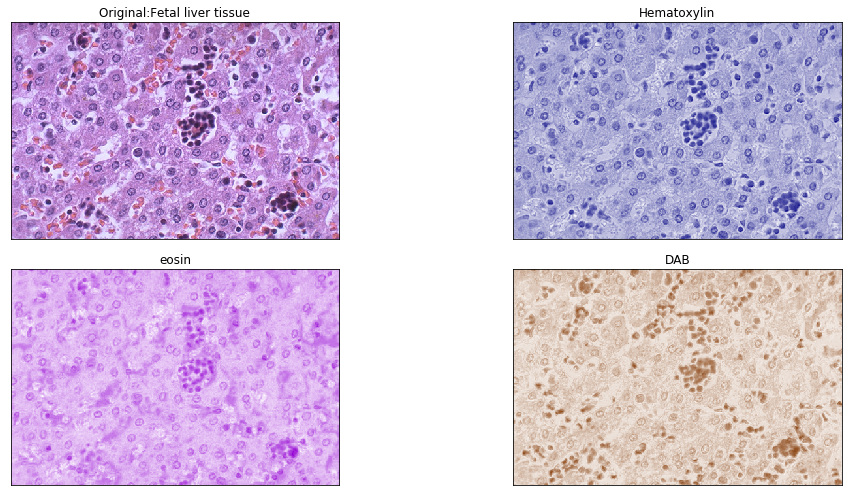

In [2]:
from skimage.color import rgb2hed
from skimage import io
import matplotlib.pyplot as plt


from matplotlib.colors import LinearSegmentedColormap
im_rgb=io.imread('resources/LIVER176.jpg' )
"""
This is normal fetal liver at high power with
islands of extramedullary hematopoiesis (mainly RBC precursors)
along with the liver cords. 
In addition to albumin, the fetal liver produces alpha-fetoprotein.
http://library.med.utah.edu/WebPath/HISTHTML/NORMAL/NORM118.html
   """  

cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])

cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet',
                                               'white'])
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white',
                                       'saddlebrown'])

ihc_hed = rgb2hed(im_rgb)



fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,figsize=(16, 7),subplot_kw={'adjustable': 'box-forced'})
axes[0,0].imshow(im_rgb)
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])
axes[0,0].set_title("Original:Fetal liver tissue")

axes[0,1].imshow(ihc_hed[:, :,0],cmap=cmap_hema)
axes[0,1].set_title("Hematoxylin")


axes[1,0].imshow(ihc_hed[:, :, 1],cmap=cmap_eosin)
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])
axes[1,0].set_title("eosin")

axes[1,1].imshow(ihc_hed[:, :, 2],cmap=cmap_dab)
axes[1,1].set_title("DAB")


plt.tight_layout()
plt.show()




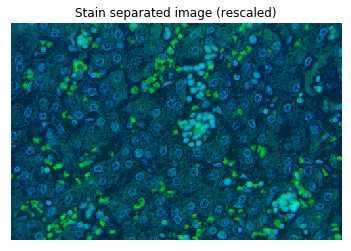

In [3]:
import numpy as np

from skimage.exposure import rescale_intensity

# Rescale hematoxylin and DAB signals and give them a fluorescence look
h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1))
d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1))
zdh = np.dstack((np.zeros_like(h), d, h))



fig, axe = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True,figsize=(7, 4),subplot_kw={'adjustable': 'box-forced'})
axe.imshow(zdh)
axe.set_xticks([]), axe.set_yticks([])
axe.set_title("Stain separated image (rescaled)")

axe.axis('off')
plt.show()